## Count Vectorization

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["Apple Orange Orange Apple",
          "Apple Banana Apple Banana",
          "Banana Apple Banana Banana Banana Apple",
          "Banana Orange Banana Banana Orange Banana",
          "Banana Apple Banana Banana Orange Banana"]

vectorizer = CountVectorizer()
vectorizer.fit(corpus)
corpus_vec = vectorizer.transform(corpus).toarray()
print(corpus_vec)

[[2 0 2]
 [2 2 0]
 [2 4 0]
 [0 4 2]
 [1 4 1]]


## TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_vec = vectorizer.transform(corpus).toarray()
print(corpus_vec)

[[ 0.64374446  0.          0.76524053]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.          0.85962194  0.51093065]
 [ 0.23304334  0.93217336  0.2770264 ]]


## co - occurrence matrix  

In [3]:
import numpy as np
np.random.seed(3) # for reproducibility

# Generate data: 5 labels, 10 examples, binary.
label_headers = 'Alice Bob Carol Dave Eve'.split(' ')
label_data = np.random.randint(0,2,(10,5)) # binary here but could be any integer.
print('labels:\n{0}'.format(label_data))

# Compute cooccurrence matrix 
cooccurrence_matrix = np.dot(label_data.transpose(),label_data)
print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix)) 

labels:
[[0 0 1 1 0]
 [0 0 1 1 1]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 1 1]
 [0 1 0 0 1]
 [1 0 0 1 0]
 [1 0 1 1 1]]

cooccurrence_matrix:
[[3 1 1 2 1]
 [1 6 2 2 2]
 [1 2 5 4 2]
 [2 2 4 6 3]
 [1 2 2 3 4]]


## co occurrence matrix in percentage

In [4]:
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))



cooccurrence_matrix_percentage:
[[ 1.          0.33333333  0.33333333  0.66666667  0.33333333]
 [ 0.16666667  1.          0.33333333  0.33333333  0.33333333]
 [ 0.2         0.4         1.          0.8         0.4       ]
 [ 0.33333333  0.33333333  0.66666667  1.          0.5       ]
 [ 0.25        0.5         0.5         0.75        1.        ]]


## With a heatmap using matplotlib 

In [10]:

import numpy as np
np.random.seed(3) # for reproducibility

import matplotlib.pyplot as plt

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(40, 20))



def main():

    # Generate data: 5 labels, 10 examples, binary.
    label_headers = 'Alice Bob Carol Dave Eve'.split(' ')
    label_data = np.random.randint(0,2,(10,5)) # binary here but could be any integer.
    print('labels:\n{0}'.format(label_data))

    # Compute cooccurrence matrix 
    cooccurrence_matrix = np.dot(label_data.transpose(),label_data)
    print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix)) 

    # Compute cooccurrence matrix in percentage
    # FYI: http://stackoverflow.com/questions/19602187/numpy-divide-each-row-by-a-vector-element
    #      http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero/32106804#32106804
    cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
    with np.errstate(divide='ignore', invalid='ignore'):
        cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
    print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))

    # Add count in labels
    label_header_with_count = [ '{0} ({1})'.format(label_header, cooccurrence_matrix_diagonal[label_number]) for label_number, label_header in enumerate(label_headers)]  
    print('\nlabel_header_with_count: {0}'.format(label_header_with_count))
    # Plotting
    x_axis_size = cooccurrence_matrix_percentage.shape[0]
    y_axis_size = cooccurrence_matrix_percentage.shape[1]
    title = "Co-occurrence matrix\n"
    xlabel= ''#"Labels"
    ylabel= ''#"Labels"
    xticklabels = label_header_with_count
    yticklabels = label_header_with_count
    heatmap(cooccurrence_matrix_percentage, title, xlabel, ylabel, xticklabels, yticklabels)
    plt.savefig('image_output.png', dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    #plt.show()

if __name__ == "__main__":
    main()

labels:
[[0 0 1 1 0]
 [0 0 1 1 1]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 1 1]
 [0 1 0 0 1]
 [1 0 0 1 0]
 [1 0 1 1 1]]

cooccurrence_matrix:
[[3 1 1 2 1]
 [1 6 2 2 2]
 [1 2 5 4 2]
 [2 2 4 6 3]
 [1 2 2 3 4]]

cooccurrence_matrix_percentage:
[[ 1.          0.33333333  0.33333333  0.66666667  0.33333333]
 [ 0.16666667  1.          0.33333333  0.33333333  0.33333333]
 [ 0.2         0.4         1.          0.8         0.4       ]
 [ 0.33333333  0.33333333  0.66666667  1.          0.5       ]
 [ 0.25        0.5         0.5         0.75        1.        ]]

label_header_with_count: ['Alice (3)', 'Bob (6)', 'Carol (5)', 'Dave (6)', 'Eve (4)']


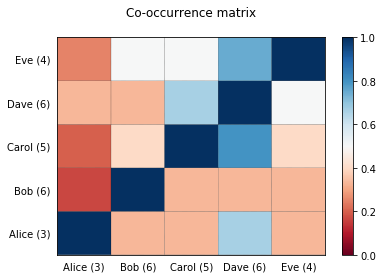